In [1]:
# numpy: numerical library
import numpy as np
# avoid broken installs by forcing Agg backend...
import matplotlib
#matplotlib.use('Agg')
# pylab: matplotlib's matlab-like interface
import pylab as plt
% matplotlib inline 
import corner

# The data we will fit:
#  x, y, sigma_y
data1 = np.array([[201,592,61],[244,401,25],[47,583,38],[287,402,15],[203,495,21],
                  [58,173,15],[210,479,27],[202,504,14],[198,510,30],[158,416,16],
                  [165,393,14],[201,442,25],[157,317,52],[131,311,16],[166,400,34],
                  [160,337,31],[186,423,42],[125,334,26],[218,533,16],[146,344,22]])

# plotting limits
xlimits = [0,250]
ylimits = [100,600]
title_prefix = 'Problem set 1'
plot_format = '.png'

def get_data_no_outliers():
    # pull out the x, y, and sigma_y columns, which have been packed into the
    # "data1" matrix.  "data1" has shape (20,3).  ":" means "everything in
    # that dimension".  Some of the first 5 points are outliers so for this
    # part we only grab from index 5 on, with magic "5:"
    x = data1[5:,0]
    y = data1[5:,1]
    sigmay = data1[5:,2]
    return (x, y, sigmay)

# Plot data with error bars, standard axis limits, etc.
def plot_yerr(x, y, sigmay):
    # plot data with error bars
    plt.errorbar(x, y, yerr=sigmay, fmt='.', ms=7, lw=1, color='k')
    # if you put '$' in you can make Latex labels
    plt.xlabel('$x$')
    plt.ylabel('$y$')
    plt.xlim(*xlimits)
    plt.ylim(*ylimits)
    plt.title(title_prefix)

# Plot a   y = mx + b  line.
def plot_line(b, m, **kwargs):
    x = np.array(xlimits)
    y = b + m*x
    p = plt.plot(x, y, 'k-', alpha=0.5, **kwargs)
    plt.xlim(*xlimits)
    plt.ylim(*ylimits)
    return p

# Function containing code for Problem 1.
def problem1():
    (x, y, sigmay) = get_data_no_outliers()

    # plot the data points...
    plot_yerr(x, y, sigmay)
    # save just the data points plot.
    plt.savefig('p1-data' + plot_format)

    # now find the linear algebra solution, *ignoring* the error bars.
    (m, b) = problem1_ols(x, y)
    plot_line(m, b)
    plt.title(title_prefix + ': Ordinary Least Squares')
    plt.savefig('p1-ols' + plot_format)

    # find the weighted least-squares solution (using the error bars).
    (m, b) = problem1_wls(x, y, sigmay)
    # clear the figure
    plt.clf()
    # re-plot the data points
    plot_yerr(x, y, sigmay)
    # plot the sweet new fit line.
    plot_line(m, b)
    plt.title(title_prefix + ': Weighted Least Squares')
    plt.savefig('p1-wls' + plot_format)

# Ordinary least squares method.  Returns best-fit (m, b)
def problem1_ols(x, y):
    # Have a look at http://en.wikipedia.org/wiki/Ordinary_Least_Squares
    # but ignore all the jargon.  We follow their notation.
    print 'OLS'
    # number of data points
    N = len(x)
    # build the "X" matrix
    X = np.zeros((N,2))
    X[:,0] = 1.
    X[:,1] = x
    print 'X shape:', X.shape
    # this "dot" performs matrix multiplication.
    XTX = np.dot(X.T, X)
    print 'XTX shape:', XTX.shape
    XTy = np.dot(X.T, y)
    print 'XTy shape:', XTy.shape
    beta = np.dot(np.linalg.inv(XTX), XTy)
    print 'beta', beta
    print
    (m, b) = beta
    return (m, b)

# Weighted least squares method.  Returns best-fit (m, b)
def problem1_wls(x, y, sigmay):
    print 'WLS'
    # Weighted least squares.
    N = len(x)
    # build the inverse covariance matrix
    Cinv = np.diag(1./sigmay**2)
    # build the "X" matrix
    X = np.zeros((N,2))
    X[:,0] = 1.
    X[:,1] = x
    print 'X shape:', X.shape
    # hint: what do you think XTCinvX has to do with the uncertainties on (m,b)?
    XTCinvX = np.dot(np.dot(X.T, Cinv), X)
    print 'XTCinvX shape:', XTCinvX.shape
    XTCinvy = np.dot(np.dot(X.T, Cinv), y)
    print 'XTCinvy shape:', XTCinvy.shape
    beta = np.dot(np.linalg.inv(XTCinvX), XTCinvy)
    print 'beta', beta
    print
    (m, b) = beta
    return (m, b)

def straight_line_gaussian_likelihood(x, y, sigmay, m, b):
    '''
    Return the likelihood of drawing data values *y* at
    known values *x* given Gaussian measurement noise with standard
    deviation with known *sigmay*, where the "true" y values are
    *y_t = m * x + b*

    x: list of x coordinates
    y: list of y coordinates
    sigmay: list of y uncertainties
    m: scalar slope
    b: scalar line intercept

    Returns: scalar likelihood
    '''
    # Compute it!
    return np.prod(1./(np.sqrt(2.*np.pi) * sigmay) * np.exp(-(y - (m * x + b))**2 / (2. * sigmay**2)))

def straight_line_gaussian_loglikelihood(x, y, sigmay, m, b):
    '''
    Return the log-likelihood of drawing data values *y* at known
    values *x* given Gaussian measurement noise with standard
    deviation with known *sigmay*, where the "true" y values are *y_t
    = m * x + b*.

    x: list of x coordinates
    y: list of y coordinates
    sigmay: list of y uncertainties
    m: scalar slope
    b: scalar line intercept

    Returns: scalar likelihood
    '''
    # Compute it!
    return 0.


def problem2():
    (x, y, sigmay) = get_data_no_outliers()
    (m,b) = (2.2, 30)
    print 'Likelihood at', (m,b), 'is', straight_line_gaussian_likelihood(x, y, sigmay, m, b)
    print 'Log-likelihood at', (m,b), 'is', straight_line_gaussian_loglikelihood(x, y, sigmay, m, b)

In [2]:
def problem3():
    # Initial m,b guess
    m = 2.
    b = 20.
    # m,b step sizes (proposal distribution)
    step_m = 0.1
    step_b = 1.

    # How many MCMC steps?
    steps = 100000

    # Read the data
    (x, y, sigmay) = get_data_no_outliers()

    chain = []
    probs = []
    
    for i in range(steps):
        # Draw from the proposal distribution (take a step)
        # mnew = draw from a gaussian distribution with mean m and std step_m
        # bnew = draw from a gaussian distribution with mean b and std step_b
        #   Hint: draw a Gaussian random value with np.random.normal()
        mnew = np.random.normal(m,step_m)
        bnew = np.random.normal(b,step_b)
        # Evaluate the posterior probability at the new step
        # prob_new = straight_line_gaussian_likelihood( ... )
        prob_new = straight_line_gaussian_likelihood(x, y, sigmay, mnew, bnew)
        # Evaluate the old posterior probability...
        # prob_old = straight_line_gaussian_likelihood( ... )
        prob_old = straight_line_gaussian_likelihood(x, y, sigmay, m, b)

        # Compare new posterior to old posterior, decide whether to accept
        #   Hint: draw a uniform random value with np.random.uniform()
        prob_test = np.random.uniform(0,1)
        if (prob_new/prob_old) > prob_test:
            # accept!
            m = mnew
            b = bnew
            prob = prob_new
        else:
            prob = prob_old

        # Record current position
        chain.append((m,b))
        # Record current probability
        probs.append(prob)

    mm = [m for m,b in chain]
    bb = [b for m,b in chain]

    besti = np.argmax(probs) # buscando el maximo de todas las probabilidades guardadas
    bestm = mm[besti]
    bestb = bb[besti]
    
    plt.clf()
    plt.plot(mm, bb, 'b.')
    plt.plot(bestm, bestb, 'ro')
    plt.savefig('p3-scatter.png')

    plt.clf()
    plt.subplot(2,1,1)
    plt.plot(mm, 'k-')
    plt.ylabel('m')
    plt.subplot(2,1,2)
    plt.plot(bb, 'k-')
    plt.ylabel('b')
    plt.savefig('p3-track.png')

    print("Mejor m", bestm)
    print("Mejor n", bestb)
    
    #graficando con triangle
    plt.clf()
    corner.corner(chain, labels=['m', 'b'],
                    truths=[bestm, bestb])
    plt.savefig('p3-tri.png')
    
    
    #Ploteando la linea con los mejores valores
    plt.figure()
    plot_yerr(x, y, sigmay)
    plot_line(bestb, bestm)
    plt.title('Ajuste con bestm, bestb')
    plt.show()
    
    
    return 0.
    

OLS
X shape: (15, 2)
XTX shape: (2, 2)
XTy shape: (2,)
beta [32.00396939  2.191028  ]

WLS
X shape: (15, 2)
XTCinvX shape: (2, 2)
XTCinvy shape: (2,)
beta [34.84594131  2.23253622]

Likelihood at (2.2, 30) is 4.4045717435615407e-32
Log-likelihood at (2.2, 30) is 0.0


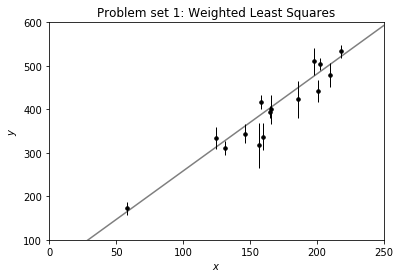

In [3]:
problem1()
problem2()

('Mejor m', 2.2316796326700308)
('Mejor n', 35.01210149471277)


<Figure size 432x288 with 0 Axes>

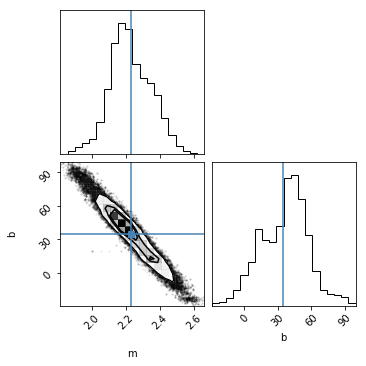

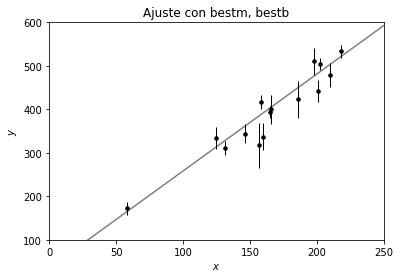

0.0

In [4]:
problem3()